In [ ]:
import pandas as pd

# Load the dataset using the correct filename
df = pd.read_csv('/content/csv_result-Autism-Adolescent-Data.csv')

# Display first few rows
df.head()


,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,0,0,0,1,1,1,1,1,1,...,m,Hispanic,yes,yes,Austria,no,6,12-16 years,Parent,NO
1,2,0,0,0,0,0,0,0,0,1,...,m,Black,no,no,Austria,no,2,12-16 years,Relative,NO
2,3,0,0,0,0,0,0,0,0,1,...,f,?,no,no,AmericanSamoa,no,2,12-16 years,?,NO
3,4,0,1,1,1,1,1,0,1,1,...,f,White-European,no,no,United Kingdom,no,7,12-16 years,Self,YES
4,5,1,1,1,1,1,1,1,0,0,...,f,?,no,no,Albania,no,7,12-16 years,?,YES


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values


,0
id,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


In [ ]:
# Check data types
df.dtypes


,0
id,int64
A1_Score,int64
A2_Score,int64
A3_Score,int64
A4_Score,int64
A5_Score,int64
A6_Score,int64
A7_Score,int64
A8_Score,int64
A9_Score,int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = ['gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation', 'Class/ASD']

# Apply label encoding
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Verify changes
df.head()


,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,0,0,0,1,1,1,1,1,1,...,1,3,1,1,6,0,6,1,3,0
1,2,0,0,0,0,0,0,0,0,1,...,1,2,0,0,6,0,2,1,4,0
2,3,0,0,0,0,0,0,0,0,1,...,0,0,0,0,2,0,2,1,0,0
3,4,0,1,1,1,1,1,0,1,1,...,0,8,0,0,30,0,7,1,5,1
4,5,1,1,1,1,1,1,1,0,0,...,0,0,0,0,1,0,7,1,0,1


Missing values:
 id                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

Dataset Summary:
                id    A1_Score    A2_Score    A3_Score    A4_Score   A5_Score  \
count  104.000000  104.000000  104.000000  104.000000  104.000000  104.00000   
mean    52.500000    0.730769    0.538462    0.653846    0.701923    0.75000   
std     30.166206    0.445708    0.500933    0.478047    0.459629    0.43511   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.00000   
25%     26.750000    0.000000    0.000000    0.000000    0.000000    0.75000   
50%     5

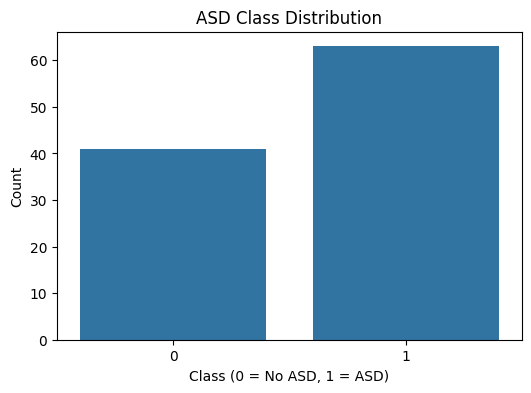

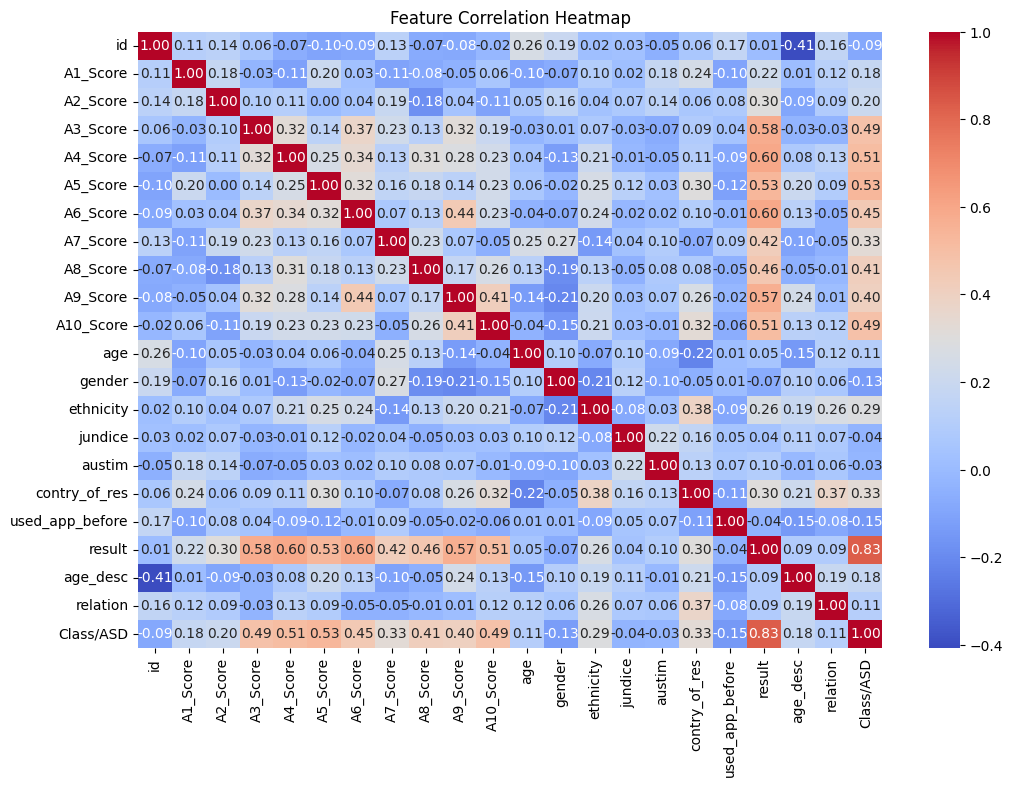

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Summary statistics
print("\nDataset Summary:\n", df.describe())

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df["Class/ASD"])
plt.title("ASD Class Distribution")
plt.xlabel("Class (0 = No ASD, 1 = ASD)")
plt.ylabel("Count")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
class_counts = df["Class/ASD"].value_counts(normalize=True) * 100
print("Class Distribution (%):\n", class_counts)


Class Distribution (%):
 Class/ASD
1    60.576923
0    39.423077
Name: proportion, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE

# Define features (X) and target variable (y)
X = df.drop("Class/ASD", axis=1)
y = df["Class/ASD"]

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["Class/ASD"] = y_resampled

# Check new class distribution
print("New Class Distribution:\n", df_resampled["Class/ASD"].value_counts(normalize=True) * 100)


New Class Distribution:
 Class/ASD
0    50.0
1    50.0
Name: proportion, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting only numerical features for scaling
num_features = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling
df[num_features] = scaler.fit_transform(df[num_features])

# Verify the transformed data
print("Scaled Feature Sample:\n", df.head())



Scaled Feature Sample:
          id  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
0 -1.715476 -1.647509 -1.080123 -1.374369  0.651658  0.577350  0.547723   
1 -1.682166 -1.647509 -1.080123 -1.374369 -1.534548 -1.732051 -1.825742   
2 -1.648855 -1.647509 -1.080123 -1.374369 -1.534548 -1.732051 -1.825742   
3 -1.615545 -1.647509  0.925820  0.727607  0.651658  0.577350  0.547723   
4 -1.582235  0.606977  0.925820  0.727607  0.651658  0.577350  0.547723   

   A7_Score  A8_Score  A9_Score  ...   gender  ethnicity   jundice    austim  \
0   0.96225  0.790569  0.517970  ...  1.03923  -0.701391  2.345208  2.535463   
1  -1.03923 -1.264911  0.517970  ...  1.03923  -1.043854 -0.426401 -0.394405   
2  -1.03923 -1.264911  0.517970  ... -0.96225  -1.728780 -0.426401 -0.394405   
3  -1.03923  0.790569  0.517970  ... -0.96225   1.010925 -0.426401 -0.394405   
4   0.96225 -1.264911 -1.930615  ... -0.96225  -1.728780 -0.426401 -0.394405   

   contry_of_res  used_app_before    result 

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest with ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)  # Selecting top 10 features
X_new = selector.fit_transform(X, y)

# Get selected feature indices
selected_features = X.columns[selector.get_support()]
print("Top 10 Selected Features:\n", selected_features)


Top 10 Selected Features:
 Index(['A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score',
       'A9_Score', 'A10_Score', 'contry_of_res', 'result'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split

# Select only the top 10 features
X_selected = X[selected_features]

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Print shapes to verify
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (83, 10)
Testing set shape: (21, 10)


In [ ]:
# Convert target variable to integer (binary format)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Re-run the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Model Accuracy:", accuracy)


Logistic Regression Model Accuracy: 1.0


Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00         8
           0       1.00      1.00      1.00        13

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



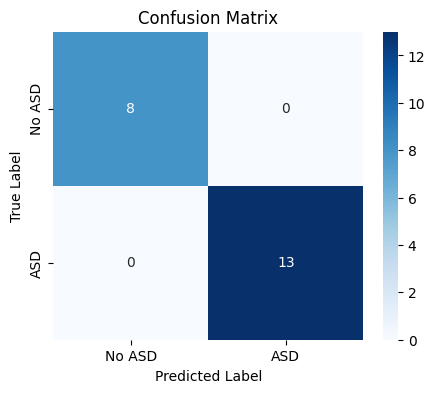

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate and print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No ASD', 'ASD'], yticklabels=['No ASD', 'ASD'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print results
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())


Cross-validation scores: [0.94117647 0.94117647 1.         0.9375     1.        ]
Mean accuracy: 0.9639705882352942
Standard deviation: 0.02944850646250116


In [ ]:
import numpy as np

# Retrieve feature coefficients
feature_importance = np.abs(model.coef_[0])  # Absolute values of coefficients
features = X_train.columns

# Combine and sort
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importance_df)


         Feature  Importance
9         result    2.171228
2       A5_Score    1.152985
7      A10_Score    0.884112
8  contry_of_res    0.761500
0       A3_Score    0.741220
5       A8_Score    0.657337
3       A6_Score    0.595795
4       A7_Score    0.573194
1       A4_Score    0.423122
6       A9_Score    0.110164


<ipython-input-23-d00cf25cd4e6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='coolwarm')


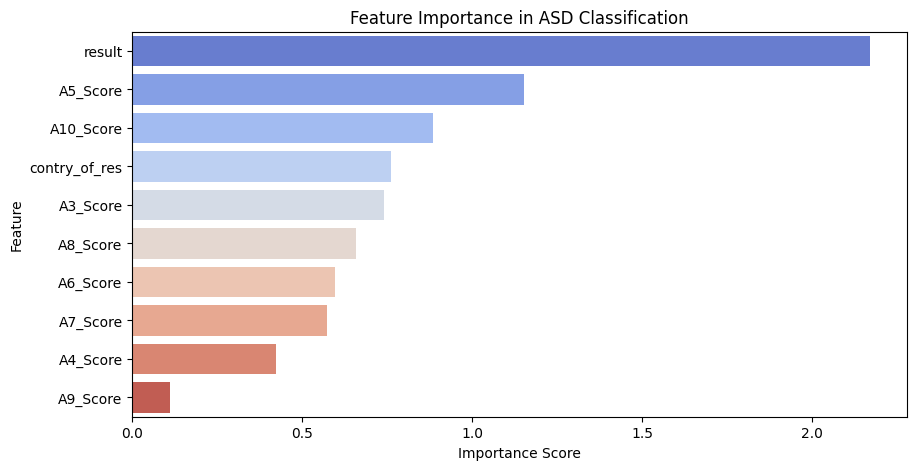

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='coolwarm')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in ASD Classification")
plt.show()


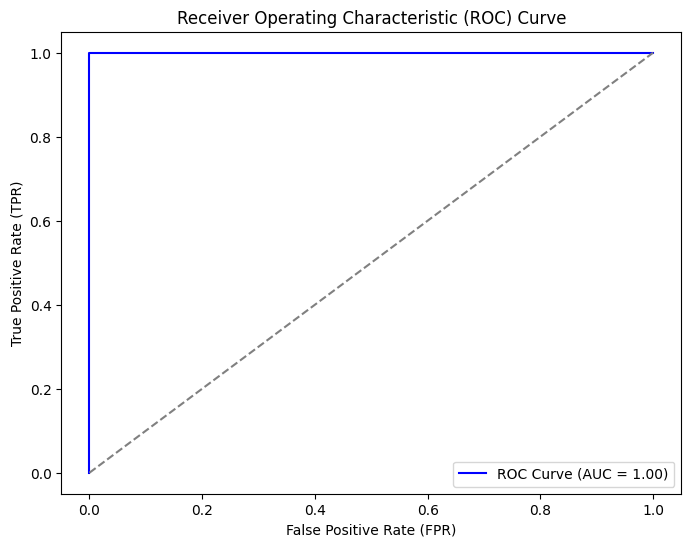

In [ ]:
# Compute ROC curve and AUC score with specified positive label
fpr, tpr, _ = roc_curve(y_test, y_probs, pos_label=0)  # Set positive class

roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


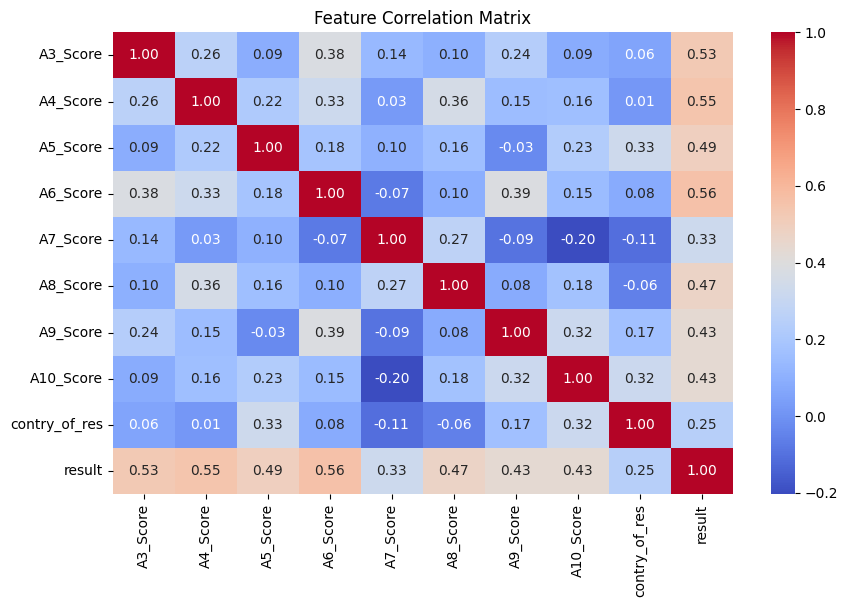

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check correlation
plt.figure(figsize=(10, 6))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Lasso (L1) Logistic Regression
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)  # Adjust C to control regularization strength
lasso_model.fit(X_train_scaled, y_train)

# Get feature importance (absolute values of coefficients)
lasso_importance = abs(lasso_model.coef_[0])
feature_names = X_train.columns

# Display feature importance
lasso_feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': lasso_importance})
lasso_feature_importance = lasso_feature_importance.sort_values(by="Importance", ascending=False)
print(lasso_feature_importance)


         Feature  Importance
9         result     1.66652
0       A3_Score     0.00000
1       A4_Score     0.00000
2       A5_Score     0.00000
4       A7_Score     0.00000
3       A6_Score     0.00000
5       A8_Score     0.00000
6       A9_Score     0.00000
7      A10_Score     0.00000
8  contry_of_res     0.00000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
